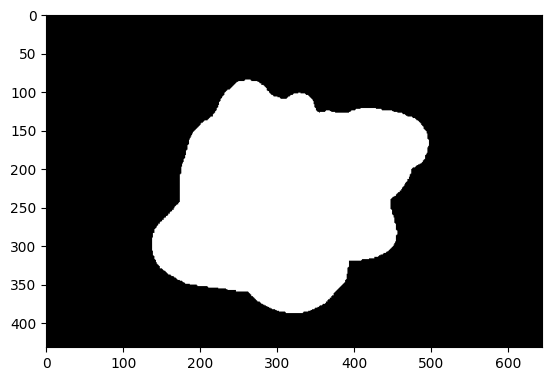

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, measure, draw
from scipy.ndimage import distance_transform_edt

img = cv2.imread('test.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray[gray > 127] = 255
gray[gray < 128] = 0

binary_image = gray

plt.imshow(binary_image, cmap='gray')
plt.show()

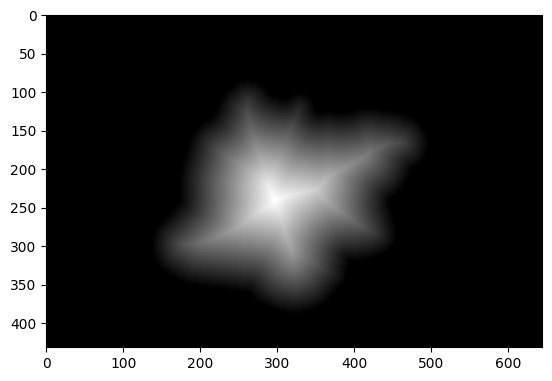

(432, 645)

In [118]:
# Perform distance transform
dist_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='gray')
plt.show()
dist_transform.shape

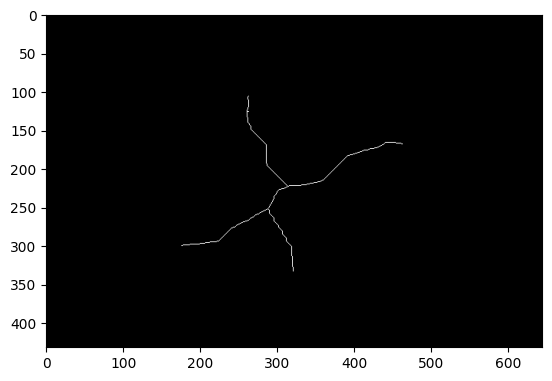

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


(432, 645)

In [ ]:
skeleton = morphology.skeletonize(binary_image)

plt.imshow(skeleton, cmap='gray')
plt.show()
print(skeleton)
skeleton.shape

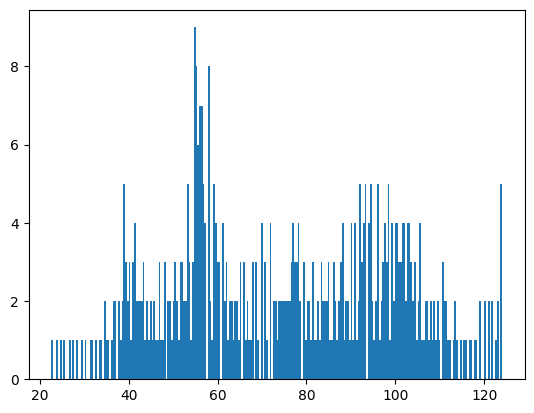

(498,)

In [ ]:
widths = distance[skeleton]

plt.hist(widths.ravel(), bins=256)
plt.show()
widths.shape

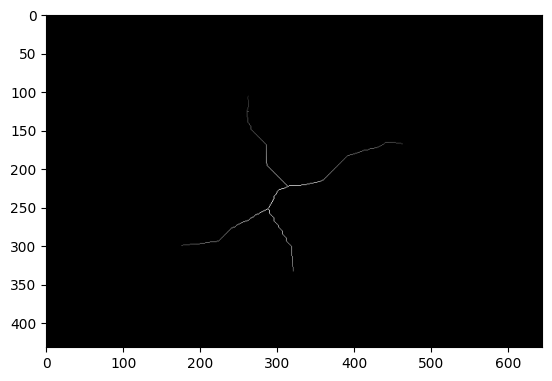

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(432, 645)

In [125]:
widths_dt = np.where(skeleton,dist_transform,0)

plt.imshow(widths_dt, cmap='gray')
plt.show()
print(widths_dt)
widths_dt.shape

In [156]:
_, max_val, _, max_loc = cv2.minMaxLoc(widths_dt)
print(max_val)
print(max_loc)

123.0
(296, 238)


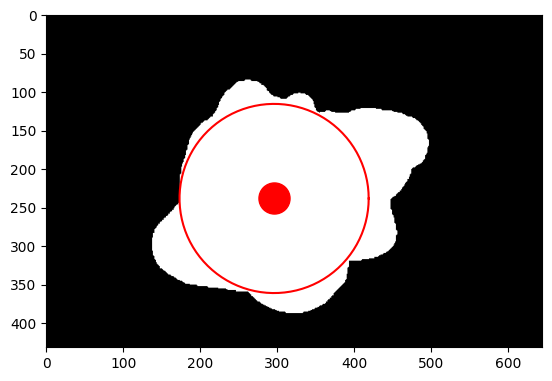

In [ ]:
from skimage.draw import circle_perimeter

_, max_val, _, max_loc = cv2.minMaxLoc(widths_dt)
binary_image_with_max = binary_image.copy()

plt.imshow(binary_image_with_max, cmap='gray')

plt.scatter([max_loc[0]], [max_loc[1]], c='red', s=500)

theta = np.linspace(0, 2*np.pi, 100)
x = max_loc[0] + max_val * np.cos(theta)
y = max_loc[1] + max_val * np.sin(theta)

plt.plot(x,y,'-r')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data
from scipy.ndimage import label
from skimage.measure import regionprops

# Load the binary image
binary_image = data.binary_blobs()

# Perform skeletonization
skeleton = skeletonize(binary_image)

# Label each connected component (each individual skeleton) of the skeleton
labelled_skeleton, num = label(skeleton)

# Initialize an array to hold the lengths of the skeletons
lengths = np.zeros(num+1, dtype=int)

# Measure the length of each skeleton
for region in regionprops(labelled_skeleton):
    lengths[region.label] = region.area

# Find the label of the longest skeleton
longest_skeleton_label = np.argmax(lengths)

# Create a new image where only the longest skeleton is kept
longest_skeleton = np.where(labelled_skeleton == longest_skeleton_label, 1, 0)

# Display the original skeleton and the longest skeleton
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original Skeleton', fontsize=20)

ax[1].imshow(longest_skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Longest Skeleton', fontsize=20)

fig.tight_layout()
plt.show()